In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Bank Customer Churn Prediction.csv'

In [55]:
df.duplicated().sum()

0

In [56]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [5]:
df.drop('customer_id', axis=1, inplace=True)
df.head()

NameError: name 'df' is not defined

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.tree import plot_tree

In [7]:
X = df.drop('churn', axis=1)
y = df['churn']

NameError: name 'df' is not defined

In [80]:
# Convert categorical variables to numerical using LabelEncoder
le = LabelEncoder()
for col in ['gender', 'country']:
    X[col] = le.fit_transform(X[col])

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [2]:
# Define hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [0, 2, 4, 6, 8, 10, 20, 30],
    'min_samples_split': [2, 4, 6, 8, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8, 10, 15, 20]}

In [3]:
# Create decision tree classifier
dtc = DecisionTreeClassifier()

NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:
# Perform grid search over hyperparameter grid
grid_search = GridSearchCV(dtc, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

In [4]:
# Print best hyperparameters and corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

NameError: name 'grid_search' is not defined

In [189]:
# Create a decision tree classifier with the best hyperparameters
dt = DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf=20, min_samples_split=25)


In [190]:
# Train the model on the training data
dt.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf=20,
                       min_samples_split=25)

In [191]:
# Test the model on the testing data
y_pred = dt.predict(X_test)


In [192]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [193]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [194]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [195]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('AUC:', auc)

Accuracy: 0.8396666666666667
Precision: 0.6339712918660287
Recall: 0.4468802698145025
F1 score: 0.5242334322453016
AUC: 0.691657833286977


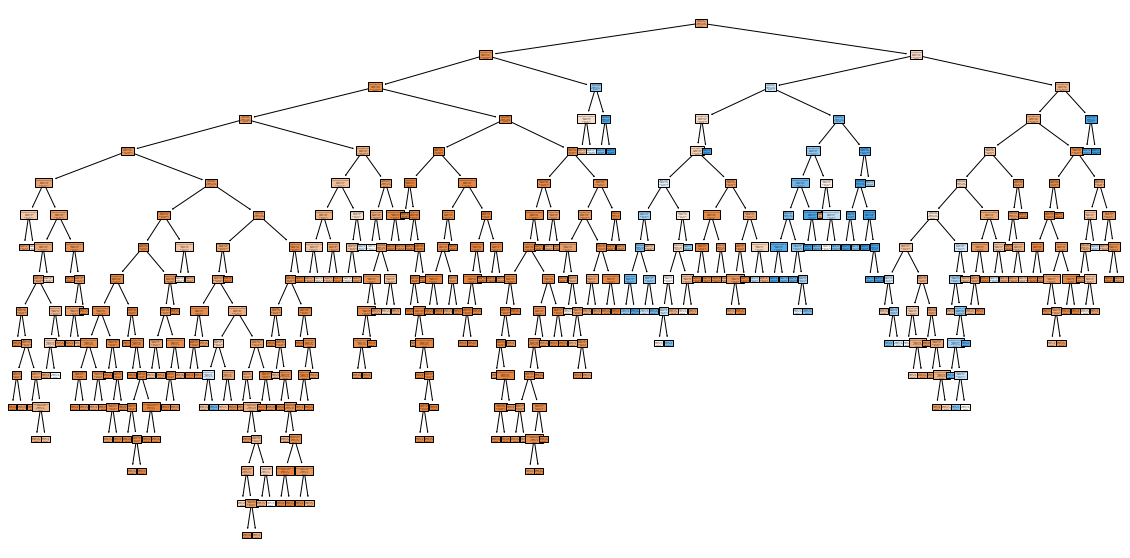

In [196]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=["0", "1"])
plt.show()